#### Author: Muhammad Ali Abbasi

### Advanced Level Task

### Task 3: Next Word Prediction

#### Installing and Importing Libraries

In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [4]:
path = '/content/1661-0.txt'
text = open(path).read().lower()
print('Corpus Length:', len(text))

Corpus Length: 581888


### Data Processing

In [10]:
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
print(f'unique chars: {len(character)}')

unique chars: 73


In [11]:
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [12]:
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


'e'

In [13]:
print(X[0][0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True]


In [14]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [15]:
X.shape

(193950, 40, 73)

In [16]:
y.shape

(193950, 73)

### Creating the Model

In [17]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

### Model Summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


### Training The Model

In [19]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=7, 
                    shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 187s 123ms/step - loss: 1.9583 - accuracy: 0.4255 - val_loss: 2.1704 - val_accuracy: 0.4082
Epoch 2/7
1501/1501 [==============================] - 183s 122ms/step - loss: 1.6168 - accuracy: 0.5153 - val_loss: 2.0631 - val_accuracy: 0.4546
Epoch 3/7
1501/1501 [==============================] - 182s 122ms/step - loss: 1.5223 - accuracy: 0.5421 - val_loss: 2.0235 - val_accuracy: 0.4521
Epoch 4/7
1501/1501 [==============================] - 190s 127ms/step - loss: 1.4697 - accuracy: 0.5550 - val_loss: 2.0446 - val_accuracy: 0.4603
Epoch 5/7
1501/1501 [==============================] - 184s 123ms/step - loss: 1.4378 - accuracy: 0.5648 - val_loss: 2.0050 - val_accuracy: 0.4670
Epoch 6/7
1501/1501 [==============================] - 182s 121ms/step - loss: 1.4122 - accuracy: 0.5711 - val_loss: 2.0318 - val_accuracy: 0.4716
Epoch 7/7
1501/1501 [==============================] - 182s 121ms/step - loss: 1.3935 - accuracy: 0.5766 - val_loss: 2

### Saving the Model

In [20]:
model.save('NW_keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

### Loading The Model

In [21]:
model = load_model('NW_keras_model.h5')
history = pickle.load(open("history.p", "rb"))

### Model Evalutaion

In [22]:
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 96s 16ms/step - loss: 1.3516 - accuracy: 0.5886
Test Loss 1.3515654802322388
Test Accuracy 0.588579535484314


### Plotting and Training Validation Plots

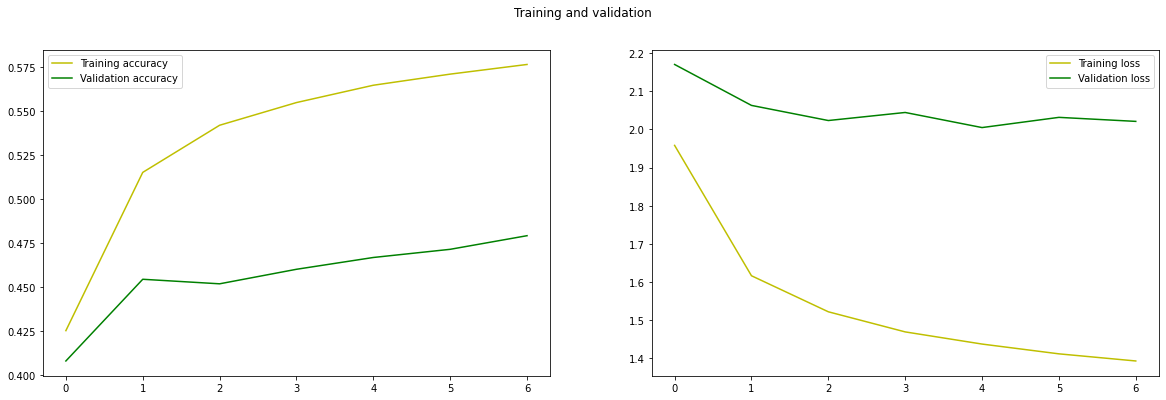

In [23]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [24]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Functions for next Probable Characters

In [25]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [26]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [27]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

### Prediction

In [34]:
quotes = [
          "You only live once, but if you do it right, once is enough.",
          "Whether you think you can or you think you can’t, you’re right.",
          "The journey of a thousand miles begins with one step.",
          "That which does not kill us makes us stronger.",
          "Life is what happens when you’re busy making other plans."
          ]

In [35]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

you only live once, but if you do it rig
['ht ', 'gly ', 'es ', 'al ', 'ner ']

whether you think you can or you think y
['ou ', 'et ', 'at ', 'ir ', 'luting ']

the journey of a thousand miles begins w
['hich ', 'ith ', 'ere ', 'as ', 'ould ']

that which does not kill us makes us str
['eet ', 'ange ', 'ink ', 'uck ', 'ong ']

life is what happens when you’re busy ma
['n, ', 'rkethes ', 'tters ', 'de ', 'ster ']

